In [ ]:
import numpy as np
import math
import pandas as pd
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import yfinance as yf

In [3]:
# split data set training/valid/test // 80/10/10
valid_set_percentage = 10
test_set_percentage = 10

In [20]:
# display parent directory and working directory
print(os.path.dirname(os.getcwd()) + ':', os.listdir(os.path.dirname(os.getcwd())));
print(os.getcwd() +  ':',os.listdir(os.getcwd()));

C:\Users\Piotr\Documents: ['.conda', '.keras', '.RData', '.Rhistory', 'addPatt.R', 'adresy0.odb', 'Artykuł.docx', 'Baza danych1.accdb', 'Bluetooth Folder', 'Correlated_normal', 'Custom Office Templates', 'dan.txt', 'dan1.txt', 'desktop.ini', 'Fax', 'GitHub', 'gretl', 'John Hull - Kontrakty terminowe i opcje - Wprowadzenie (1).pdf', 'Kod AM.R', 'Matematyka_finansowa', 'Moja muzyka', 'Moje obrazy', 'Moje wideo', 'Moje źródła danych', 'Muzyka — skrót.lnk', 'My Games', 'My IML Studio Files', 'My Kindle Content', 'My SAS Files', 'nauka do kolokwium', 'Python Scripts', 'R', 'Scanned Documents', 'SQL Server Management Studio', 'TeXnicCenter-Project.tcp', 'TeXnicCenter-Project.tps', 'Visual Studio 2010', 'Visual Studio 2015', 'Wolfram Mathematica']
C:\Users\Piotr\Documents\Python Scripts: ['.ipynb_checkpoints', 'Untitled.ipynb']


[*********************100%***********************]  1 of 1 downloaded


Text(0, 0.5, 'Volume')

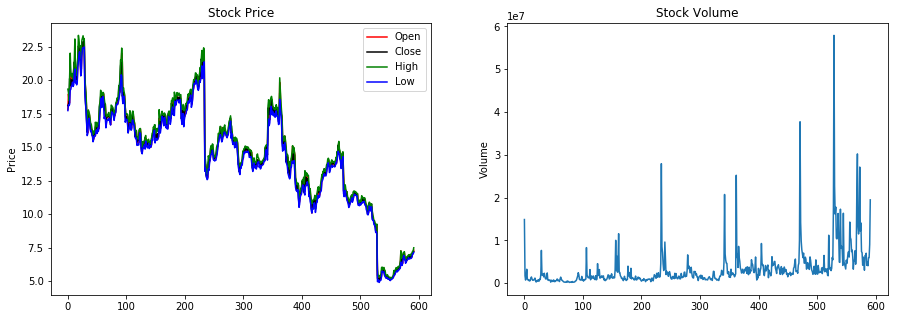

In [19]:
# Get data from yahoo.com - Cloudera stock exchange dataset
data = yf.download('CLDR', '2017-04-01', '2019-09-05')

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(data.Open.values, color='red', label='Open')
plt.plot(data.Close.values, color='black', label='Close')
plt.plot(data.High.values, color='green', label='High')
plt.plot(data.Low.values, color='blue', label='Low')
plt.title('Stock Price')
plt.ylabel('Price')
plt.legend(loc='best')
plt.subplot(1, 2, 2)
plt.plot(data.Volume.values)
plt.title('Stock Volume')
plt.ylabel('Volume')



In [25]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 592 entries, 2017-04-28 to 2019-09-04
Data columns (total 6 columns):
Open         592 non-null float64
High         592 non-null float64
Low          592 non-null float64
Close        592 non-null float64
Adj Close    592 non-null float64
Volume       592 non-null int64
dtypes: float64(5), int64(1)
memory usage: 32.4 KB


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-28,17.80,19.33,17.73,18.10,18.10,14871500
2017-05-01,18.97,19.09,18.16,18.19,18.19,1728700
2017-05-02,18.37,18.49,18.10,18.39,18.39,720200
2017-05-03,18.31,20.12,18.21,20.12,20.12,1520100
2017-05-04,21.10,22.02,19.25,19.58,19.58,3256400
